# Loading Audio Data

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from pyAudioAnalysis import MidTermFeatures as aF
import os


dirs = ["data/open_middle_door/train", "data/grant_me_access/train", "data/unlock_the_gate/train"]  
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05 
class_names = [os.path.dirname(d) for d in dirs]

# segment-level feature extraction:
features = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)
    
# (each element of the features list contains a 
# (samples x segment features) = (48 x 138) feature matrix)
print(features[0].shape, features[1].shape, features[2].shape)

Analyzing file 1 of 21: data/open_middle_door/train\1 (2).wav
Analyzing file 2 of 21: data/open_middle_door/train\1.wav
Analyzing file 3 of 21: data/open_middle_door/train\2 (2).wav
Analyzing file 4 of 21: data/open_middle_door/train\2.wav
Analyzing file 5 of 21: data/open_middle_door/train\3 (2).wav
Analyzing file 6 of 21: data/open_middle_door/train\3.wav
Analyzing file 7 of 21: data/open_middle_door/train\4 (2).wav
Analyzing file 8 of 21: data/open_middle_door/train\4.wav
Analyzing file 9 of 21: data/open_middle_door/train\carole1.wav
Analyzing file 10 of 21: data/open_middle_door/train\carole2.wav
Analyzing file 11 of 21: data/open_middle_door/train\carole3.wav
Analyzing file 12 of 21: data/open_middle_door/train\carole4.wav
Analyzing file 13 of 21: data/open_middle_door/train\m1.wav
Analyzing file 14 of 21: data/open_middle_door/train\m14.wav
Analyzing file 15 of 21: data/open_middle_door/train\m15.wav
Analyzing file 16 of 21: data/open_middle_door/train\m16.wav
Analyzing file 17 

## Visualization of selected features

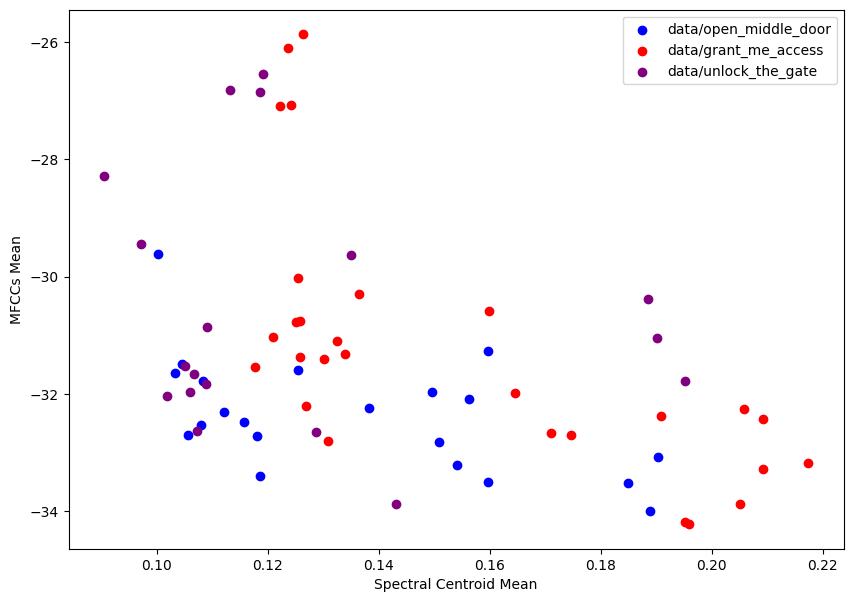

In [11]:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('mfcc_1_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('mfcc_1_mean')]])
f3 = np.array([features[2][:, fn.index('spectral_centroid_mean')],
               features[2][:, fn.index('mfcc_1_mean')]])

# Check if features were extracted
if f1 is not None and f2 is not None and f3 is not None:
    # Plot features
    plt.figure(figsize=(10, 7))
    plt.scatter(x=f1[0, :],  y=f1[1, :], 
                    label=class_names[0], color='b')
    plt.scatter(x=f2[0, :], y=f2[1, :], 
                    label=class_names[1], color='r')
    plt.scatter(x=f3[0, :], y=f3[1, :], 
                    label=class_names[2], color='purple')
    plt.xlabel('Spectral Centroid Mean')
    plt.ylabel('MFCCs Mean')
    plt.legend()
    plt.show()
else:
    print("No features were extracted. Please check the directory paths and contents.")

In [12]:
from pyAudioAnalysis.audioTrainTest import extract_features_and_train

# train the svm classifier
extract_features_and_train(dirs, m_win, m_step, s_win, s_step, "svm_rbf", "svm_model_words")


Analyzing file 1 of 21: data/open_middle_door/train\1 (2).wav
Analyzing file 2 of 21: data/open_middle_door/train\1.wav
Analyzing file 3 of 21: data/open_middle_door/train\2 (2).wav
Analyzing file 4 of 21: data/open_middle_door/train\2.wav
Analyzing file 5 of 21: data/open_middle_door/train\3 (2).wav
Analyzing file 6 of 21: data/open_middle_door/train\3.wav
Analyzing file 7 of 21: data/open_middle_door/train\4 (2).wav
Analyzing file 8 of 21: data/open_middle_door/train\4.wav
Analyzing file 9 of 21: data/open_middle_door/train\carole1.wav
Analyzing file 10 of 21: data/open_middle_door/train\carole2.wav
Analyzing file 11 of 21: data/open_middle_door/train\carole3.wav
Analyzing file 12 of 21: data/open_middle_door/train\carole4.wav
Analyzing file 13 of 21: data/open_middle_door/train\m1.wav
Analyzing file 14 of 21: data/open_middle_door/train\m14.wav
Analyzing file 15 of 21: data/open_middle_door/train\m15.wav
Analyzing file 16 of 21: data/open_middle_door/train\m16.wav
Analyzing file 17 

In [13]:
from pyAudioAnalysis import audioTrainTest as aT
dirc = ['data/open_middle_door/test/', 'data/grant_me_access/test/', 'data/unlock_the_gate/test/']

for d in dirc:
    for filename in os.listdir(d):
        if os.path.isfile(os.path.join(d, filename)):
            print(f'{os.path.join(d, filename)}')
            c, p, p_nam = aT.file_classification(os.path.join(d, filename), "svm_model_words","svm_rbf")
            print(f'P({p_nam[0]}={p[0]})')
            print(f'P({p_nam[1]}={p[1]})')
            print(f'P({p_nam[2]}={p[2]})')
            print()

data/open_middle_door/test/10 (2).wav


P(data/open_middle_door/train=0.6769623039505263)
P(data/grant_me_access/train=0.03953397886377547)
P(data/unlock_the_gate/train=0.2835037171856983)

data/open_middle_door/test/10.wav
P(data/open_middle_door/train=0.5702977685730712)
P(data/grant_me_access/train=0.05816381054866702)
P(data/unlock_the_gate/train=0.3715384208782618)

data/open_middle_door/test/9 (2).wav
P(data/open_middle_door/train=0.8279659030344362)
P(data/grant_me_access/train=0.010461317271922748)
P(data/unlock_the_gate/train=0.16157277969364123)

data/open_middle_door/test/9.wav
P(data/open_middle_door/train=0.07347900808630452)
P(data/grant_me_access/train=0.09936044578467741)
P(data/unlock_the_gate/train=0.827160546129018)

data/open_middle_door/test/carole10.wav
P(data/open_middle_door/train=0.8893548637109652)
P(data/grant_me_access/train=0.016633454020145575)
P(data/unlock_the_gate/train=0.09401168226888891)

data/open_middle_door/test/carole9.wav
P(data/open_middle_door/train=0.9232804158994207)
P(data/grant_